In [1]:
## all imports
from IPython.display import HTML
import chardet
import io
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
from time import sleep
import requests
import operator
import socket
import _pickle
import math
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import json

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC



#from secret import *

## WRITING THE FILES

### Firefox Driver

In [4]:
wd = webdriver.Firefox()
#driver.implicitly_wait(10)
wd.get('http://www.afl.com.au/stats')

### FUNCTION THAT PASSES IN YEAR AND ROUND AND DOWNLOADS JSON FILE

In [20]:
def data_download (_year,_round):
    movable_part = "CD_S{year}014&roundId=CD_R{year}014{round}".format(year=_year, round= _round)
    #print(movable_part)
    script = '' + \
    'window.a = jQuery.ajax({'+\
    '        url:"http://www.afl.com.au/api/cfs/afl/statsCentre/teams?competitionId={}",'.format(movable_part) +\
    '        headers: {'+\
    '                    "X-media-mis-token":"b292a40a7cfcbe808732a7ce5aa62114"'+\
    '                 }'+\
    '        });' 

    ## asks the firefox webdriver to execute this scripty
    #print (script)
    wd.execute_script(script)
    print (_year, _round)
    import time
    import json
    time.sleep(1)
    wd.execute_script("console.log('the dude', window.a.responseText);")
    result = wd.execute_script("return window.a.responseText")
    
    try:
        data = json.loads(result)
        filename= _year  + '_' + _round + '.txt'
        #with open('afl_raw/' + filename, 'w') as f:
        with open ('afl_raw/test/' + filename, 'w') as f:
            f.write(result)
            print ('exported ' + filename)
        
    except Exception as e:
        filename= _year  + '_' + _round + '.txt'
        #ith open('afl_raw/' + filename, 'w') as f:
        with open('afl_raw/test/' + filename, 'w') as f:
            f.write('error occured on writing')
            print ('export error on ' + filename)
        

            

    

### HARD CODED JQUERY TO PUT INTO CONSOLE

jQuery.ajax({url:"http://www.afl.com.au/api/cfs/afl/statsCentre/teams?competitionId=CD_S2017014&roundId=CD_R201701406", headers: {"X-media-mis-token":"b0e22835816435c8436393d14e62ecf7"}});

jQuery.ajax({url:" http://www.afl.com.au/api/cfs/afl/statsCentre/teams?competitionId=CD_S2003014&roundId=CD_R200301401", headers: {"X-media-mis-token":"b0e22835816435c8436393d14e62ecf7"}});

### LIST OF POSSIBLE YEARS AND ROUNDS FOR DATA

In [171]:
year_list = ['2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','2003','2002', '2001']
round_list = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']

### RUN A LOOP OVER ALL ROUNDS IN ALL YEARS TO INITIATE THE DOWNLOAD FUNCTION

In [22]:
for i in year_list:
    current_year = i
    for i in round_list:
        current_round = i
        data_download(current_year,current_round)

2017 01
exported 2017_01.txt
2017 02
exported 2017_02.txt
2017 03
exported 2017_03.txt
2017 04
exported 2017_04.txt
2017 05
exported 2017_05.txt
2017 06
exported 2017_06.txt
2017 07
exported 2017_07.txt
2017 08
export error on 2017_08.txt
2017 09
export error on 2017_09.txt
2017 10
export error on 2017_10.txt
2017 11
export error on 2017_11.txt
2017 12
export error on 2017_12.txt
2017 13


KeyboardInterrupt: 

### TESTING INDIVIDUAL DOWNLOADS

current_year = '2005'
current_round = '05'

data_download(current_year,current_round)

## LOAD FILES IN PYTHON

### CREATE DICTIONARY FOR MATCH ID'S

In [172]:
match_dict= {0:'01',1:'01',2:'02',3:'02', 4:'03',5:'03', 6:'04',7:'04',8:'05',9:'05', 10:'06',11:'06',12:'07',13:'07', 14:'08',15:'08', 16:'09',17:'09'}
print (match_dict[3])

02


### MERGING TWO DICTIONARIES AND ADDING TO DATAFRAME

a = {"b":1, "c": 2}

d = {"b":3, "c": 2}

x = [a,d]

pd.DataFrame(x)



z = {**x, **y}
http://stackoverflow.com/questions/38987/how-to-merge-two-python-dictionaries-in-a-single-expression

### FUNCTION TO LOOK AT EACH MATCH, SORT AND  ASSIGN A MATCH_ID

In [220]:
def structure_data(d, i, _year, _round):
    team_stats= d['team']
    match_stats = d['stats']['totals']
    # ** merges two dictionaries together
    stats = {**team_stats, **match_stats}
    stats['year'] = _year
    stats['round'] = _round
    # Finding match_id
    #string formatting mini lanuage
    match_dict= {0:'01',1:'01',2:'02',3:'02', 4:'03',5:'03', 6:'04',7:'04',8:'05',9:'05', 10:'06',11:'06',12:'07',13:'07', 14:'08',15:'08', 16:'09',17:'09'}
    #match_number = "{0:0=2d}".format(int(math.ceil(i/2)*2))
    match_number = (match_dict[i])
    stats['match_id'] = 'CD_M' + _year + '014'+  _round + str(match_number)
    #CD_M20170140401
    # W know home is the evan numbers in the list- so if there is no remainder when divived by two its divisible by 2
    stats['home'] = i % 2 == 0
    stats = {**stats, **stats['clearances']}
    stats.pop('clearances', None)
    #try:
        #stats = {**stats, **stats['interchangeCounts']}
        #stats.pop('interchangeCounts', None)
   #except:
        #print (stats)
        # interchange counts are equal to zero
    return stats

### FUNCTION TO READ EACH DATA FILE- RETURNS A RELEVENT LIST OF ROUNDS GAMES

In [221]:
def readfile(_year, _round):
    filename= _year  + '_' + _round + '.txt'
    path = 'afl_raw/' + filename
    print (current_year, current_round, path)
    with open(path) as f:
        json_string = f.read()
        json_string = json_string.strip()
        if json_string != "error occured on writing":
            data = json.loads(json_string)
            this_round = []
            for i, d in enumerate(data['lists']):
                stats = structure_data(d, i,_year, _round)
                this_round.append(stats)
            return this_round

### PUT THE ROUND LIST INTO A DATA FRAME

In [222]:
mega_list = []
for current_year in year_list:
    for current_round in round_list:
        data = readfile(current_year, current_round)
        if data:
            try:
                mega_list.extend(data)
            except Exception as e:
                print(e, data)
            #print (current_year)
        #except Exception as e:
            #print (e)


2017 01 afl_raw/2017_01.txt
2017 02 afl_raw/2017_02.txt
2017 03 afl_raw/2017_03.txt
2017 04 afl_raw/2017_04.txt
2017 05 afl_raw/2017_05.txt
2017 06 afl_raw/2017_06.txt
2017 07 afl_raw/2017_07.txt
2017 08 afl_raw/2017_08.txt
2017 09 afl_raw/2017_09.txt
2017 10 afl_raw/2017_10.txt
2017 11 afl_raw/2017_11.txt
2017 12 afl_raw/2017_12.txt
2017 13 afl_raw/2017_13.txt
2017 14 afl_raw/2017_14.txt
2017 15 afl_raw/2017_15.txt
2017 16 afl_raw/2017_16.txt
2017 17 afl_raw/2017_17.txt
2017 18 afl_raw/2017_18.txt
2017 19 afl_raw/2017_19.txt
2017 20 afl_raw/2017_20.txt
2017 21 afl_raw/2017_21.txt
2017 22 afl_raw/2017_22.txt
2017 23 afl_raw/2017_23.txt
2017 24 afl_raw/2017_24.txt
2017 25 afl_raw/2017_25.txt
2017 26 afl_raw/2017_26.txt
2017 27 afl_raw/2017_27.txt
2016 01 afl_raw/2016_01.txt
2016 02 afl_raw/2016_02.txt
2016 03 afl_raw/2016_03.txt
2016 04 afl_raw/2016_04.txt
2016 05 afl_raw/2016_05.txt
2016 06 afl_raw/2016_06.txt
2016 07 afl_raw/2016_07.txt
2016 08 afl_raw/2016_08.txt
2016 09 afl_raw/2016

### TEST DATAFRAME AND REVIEW SIZE

In [223]:
df = pd.DataFrame(mega_list)
print (df.shape)
df.head(300)
df.shape

(6252, 48)


(6252, 48)

### SEE DATA TYPES

In [225]:
df.dtypes

behinds                   float64
bounces                   float64
centreClearances          float64
clangers                  float64
contestedMarks            float64
contestedPossessions      float64
disposalEfficiency        float64
disposals                 float64
dreamTeamPoints           float64
freesAgainst              float64
freesFor                  float64
goalAccuracy              float64
goalAssists               float64
goalEfficiency            float64
goals                     float64
handballs                 float64
hitouts                   float64
home                         bool
inside50s                 float64
intercepts                float64
interchangeCounts          object
kicks                     float64
lastUpdated                object
marks                     float64
marksInside50             float64
match_id                   object
metresGained               object
onePercenters             float64
ranking                    object
ratingPoints  

### ASSIGN OPPONENT- LIST TECHNIQUE

grades = []

for index, row in df.iterrows():
    current_name = row['teamName']
    current_match = row['match_id']
    print  (current_name)
    for index_, row_ in df.iterrows():
        if (row_['match_id'] == current_match) & (row_['teamName'] != current_name):
            opponent = row_['teamName']
            grades.append(opponent)
            print (opponent)
            

df['opponent'] = grades

### ASSIGN OPPONENT- VECTORISED TECHNIQUE

In [226]:
def opponent_(x):
    game_pair = df[df.match_id == x.match_id]
    other_team = game_pair[game_pair.teamName != x.teamName]
    return list(other_team.teamName)[0]

In [227]:
df['Opponent']= df.apply(opponent_, axis =1)

### TOTAL SCORE

In [228]:
def total_(x):
    total_score = x.behinds + ((x.goals)*6)                   
    return total_score

In [229]:
df['total_score']= df.apply(total_, axis =1)

### ASSIGN WIN OR LOSS- VECTORISED TECHNIQUE

In [230]:
def win_(x):
    x_score = x.total_score
    #Pair up with same match id
    game_pair = df[x.match_id == df.match_id]
    # Find the other team
    other_team = game_pair[game_pair.teamName != x.teamName]
    # Find other team score
    other_score = list(other_team.total_score)[0]
    #return (other_score)
    if x_score > other_score:
        return 'Win'
    elif x_score == other_score:
        return 'Draw'
    else: 
        return "Lose"

In [231]:
df['Result']= df.apply(win_, axis =1)

### COLUMN HEADERS CAPITALISED

In [232]:
df.columns = map(str.upper, df.columns)

### TEST IN HEAD

In [235]:
df.head()
df.shape

(6252, 51)

### TEST A SPECPIFIC ROWS RESULT

df.loc[0].total_score

### EXPORTING TO CSV (Create stable copy for web)

In [236]:
df.to_csv("afl_data_set_0.csv")

## WORK WITH STABLE CSV

### LOAD DATA FROM SYSTEM OR WEB

In [2]:
if os.path.isfile("afl_data_set_0.csv"):
    filepath = "afl_data_set_0.csv"
    print ("loading from file")
    
else:
    filepath = "https://docs.google.com/spreadsheets/d/1pfiz1CjeaS36L5CZIGqcXByj9qGpxKztXcsQ8o-1rOQ/pub?output=csv"
    print ("loading from the internet")



loading from file


### READ CSV FILE

In [3]:
df = pd.read_csv(filepath)
print ("done")

done


### TEST DATAFRAME

In [4]:
df.head()
#df.shape

,Unnamed: 0,BEHINDS,BOUNCES,CENTRECLEARANCES,CLANGERS,CONTESTEDMARKS,CONTESTEDPOSSESSIONS,DISPOSALEFFICIENCY,DISPOSALS,DREAMTEAMPOINTS,...,TEAMNAME,TEAMNICKNAME,TOTALCLEARANCES,TOTALPOSSESSIONS,TURNOVERS,UNCONTESTEDPOSSESSIONS,YEAR,OPPONENT,TOTAL_SCORE,RESULT
0,0,5,8,19,49,14,138,73.6,348,1604,...,Carlton,Blues,38,341,81.0,203,2017,Richmond,89,Lose
1,1,12,3,16,55,11,149,79.0,352,1551,...,Richmond,Tigers,40,354,68.0,205,2017,Carlton,132,Win
2,2,14,2,16,45,12,161,74.5,431,1835,...,Collingwood,Magpies,42,437,70.0,276,2017,Western Bulldogs,86,Lose
3,3,10,3,10,44,12,135,77.0,392,1774,...,Western Bulldogs,Bulldogs,26,394,63.0,259,2017,Collingwood,100,Win
4,4,12,6,14,51,9,139,69.7,337,1341,...,St Kilda,Saints,31,338,62.0,199,2017,Melbourne,90,Lose


## CREATE TOTALS DATAFRAME

### GROUPBY MATCH_ID TO FIND PERCENTAGES BY GAME

In [109]:
match_totals = df[["TACKLES", "CONTESTEDPOSSESSIONS", "TOTAL_SCORE", "TOTALPOSSESSIONS", "INSIDE50S", "DISPOSALEFFICIENCY", "CENTRECLEARANCES" ]].groupby(df.MATCH_ID).sum()

### ADD MATCH_ID's TO WITHIN DATAFRAME

In [110]:
match_totals["MATCH_ID"] = match_totals.index.values

In [112]:
match_totals.head(3000)

,TACKLES,CONTESTEDPOSSESSIONS,TOTAL_SCORE,TOTALPOSSESSIONS,INSIDE50S,DISPOSALEFFICIENCY,CENTRECLEARANCES,MATCH_ID
MATCH_ID,,,,,,,,
CD_M20010140101,64,268,207,630,99,160.7,33,CD_M20010140101
CD_M20010140102,52,234,166,634,112,163.3,27,CD_M20010140102
CD_M20010140103,62,326,237,670,105,166.1,37,CD_M20010140103
CD_M20010140104,74,235,219,527,104,156.5,32,CD_M20010140104
CD_M20010140105,43,250,192,556,94,160.9,25,CD_M20010140105
CD_M20010140106,72,264,164,659,103,157.0,24,CD_M20010140106
CD_M20010140107,75,248,237,563,99,155.6,34,CD_M20010140107
CD_M20010140108,43,220,200,592,105,163.0,29,CD_M20010140108
CD_M20010140201,75,243,252,551,109,166.5,38,CD_M20010140201


## ADD PERCENTAGES TO MAIN DF

### WORK ACROSS DATA FROM BOTH DATAFRAMES +  DEFINE PERCENTAGES FOR EACH ROW

In [171]:
def TACKLES_percentage(x):
    current_match_id = x.MATCH_ID
    total_row = match_totals.loc[current_match_id]
    total_row_output = total_row.TACKLES
    percentage = (x.TACKLES/ total_row_output)*100
    return float(("%.2f" % round(percentage,2)))

In [172]:
def CONTESTEDPOSSESSIONS_percentage(x):
    current_match_id = x.MATCH_ID
    total_row = match_totals.loc[current_match_id]
    total_row_output = total_row.CONTESTEDPOSSESSIONS
    percentage = (x.CONTESTEDPOSSESSIONS/ total_row_output)*100
    return float(("%.2f" % round(percentage,2)))

In [173]:
def TOTALPOSSESSIONS_percentage(x):
    current_match_id = x.MATCH_ID
    total_row = match_totals.loc[current_match_id]
    total_row_output = total_row.TOTALPOSSESSIONS
    percentage = (x.TOTALPOSSESSIONS/ total_row_output)*100
    return float(("%.2f" % round(percentage,2)))

In [174]:
def INSIDE50S_percentage(x):
    current_match_id = x.MATCH_ID
    total_row = match_totals.loc[current_match_id]
    total_row_output = total_row.INSIDE50S
    percentage = (x.INSIDE50S/ total_row_output)*100
    return float(("%.2f" % round(percentage,2)))

In [175]:
def DISPOSALEFFICIENCY_percentage(x):
    current_match_id = x.MATCH_ID
    total_row = match_totals.loc[current_match_id]
    total_row_output = total_row.DISPOSALEFFICIENCY
    percentage = (x.DISPOSALEFFICIENCY/ total_row_output)*100
    return float(("%.2f" % round(percentage,2)))

In [176]:
def CENTRECLEARANCES_percentage(x):
    current_match_id = x.MATCH_ID
    total_row = match_totals.loc[current_match_id]
    total_row_output = total_row.CENTRECLEARANCES
    percentage = (x.CENTRECLEARANCES/ total_row_output)*100
    return float(("%.2f" % round(percentage,2)))

### RUN PERCENTAGE FUNCTIONS

In [177]:
df["TACKLES_PERC"] = df.apply(TACKLES_percentage, axis=1)
df["CONTESTEDPOSSESSIONS_PERC"] = df.apply(CONTESTEDPOSSESSIONS_percentage, axis=1)
df["TOTALPOSSESSIONS_PERC"] = df.apply(TOTALPOSSESSIONS_percentage, axis=1)
df["INSIDE50S_PERC"] = df.apply(INSIDE50S_percentage, axis=1)
df["DISPOSALEFFICIENCY_PERC"] = df.apply(DISPOSALEFFICIENCY_percentage, axis=1)
df["CENTRECLEARANCES_PERC"] = df.apply(CENTRECLEARANCES_percentage, axis=1)

### REVIEW PERCENTAGES HEAD

In [203]:
df.head()

,Unnamed: 0,BEHINDS,BOUNCES,CENTRECLEARANCES,CLANGERS,CONTESTEDMARKS,CONTESTEDPOSSESSIONS,DISPOSALEFFICIENCY,DISPOSALS,DREAMTEAMPOINTS,...,OPPONENT,TOTAL_SCORE,RESULT,TACKLES_PERC,CONTESTEDPOSSESSIONS_PERC,TOTALPOSSESSIONS_PERC,INSIDE50S_PERC,DISPOSALEFFICIENCY_PERC,CENTRECLEARANCES_PERC,NUM_SORT
0,0,5,8,19,49,14,138,73.6,348,1604,...,Richmond,89,Lose,43.51,48.08,49.06,44.04,48.23,54.29,20170140101
1,1,12,3,16,55,11,149,79.0,352,1551,...,Carlton,132,Win,56.49,51.92,50.94,55.96,51.77,45.71,20170140101
2,2,14,2,16,45,12,161,74.5,431,1835,...,Western Bulldogs,86,Lose,43.51,54.39,52.59,58.49,49.17,61.54,20170140102
3,3,10,3,10,44,12,135,77.0,392,1774,...,Collingwood,100,Win,56.49,45.61,47.41,41.51,50.83,38.46,20170140102
4,4,12,6,14,51,9,139,69.7,337,1341,...,Melbourne,90,Lose,46.49,48.60,42.73,43.88,47.35,42.42,20170140103


### FLIP THE INDEX

In [216]:
match_totals.reindex(index=match_totals.index[::-1])

,New_ID_,New_ID,TACKLES,CONTESTEDPOSSESSIONS,TOTAL_SCORE,TOTALPOSSESSIONS,INSIDE50S,DISPOSALEFFICIENCY,CENTRECLEARANCES,MATCH_ID,NUM_SORT
MATCH_ID,,,,,,,,,,,
CD_M20170140709,3125,3125,105,252,195,753,97,154.2,30,CD_M20170140709,20170140709
CD_M20170140708,3124,3124,166,281,185,785,102,152.9,26,CD_M20170140708,20170140708
CD_M20170140707,3123,3123,110,257,216,728,102,144.4,29,CD_M20170140707,20170140707
CD_M20170140706,3122,3122,141,293,155,767,109,151.6,23,CD_M20170140706,20170140706
CD_M20170140705,3121,3121,141,296,223,811,119,147.7,32,CD_M20170140705,20170140705
CD_M20170140704,3120,3120,120,302,184,776,107,146.8,27,CD_M20170140704,20170140704
CD_M20170140703,3119,3119,150,274,135,702,86,147.4,17,CD_M20170140703,20170140703
CD_M20170140702,3118,3118,140,329,231,783,135,139.0,34,CD_M20170140702,20170140702
CD_M20170140701,3117,3117,165,298,193,783,103,146.4,27,CD_M20170140701,20170140701


### ADD A SEQUENTIAL NUMBER COLUMN

In [217]:
match_totals.insert(0, 'New_ID_', range(0, 0 + len(match_totals)))
match_totals

ValueError: cannot insert New_ID_, already exists

## ANALYSE

### DRAW GRAPHS IN THE NOTEBOOK

In [51]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [190]:
df_win = df[df.RESULT == "Win"]

In [191]:
df_lose = df[df.RESULT == "Lose"]

#### TOTAL TACKLES OVER TIME

KeyError: 'New_ID_'

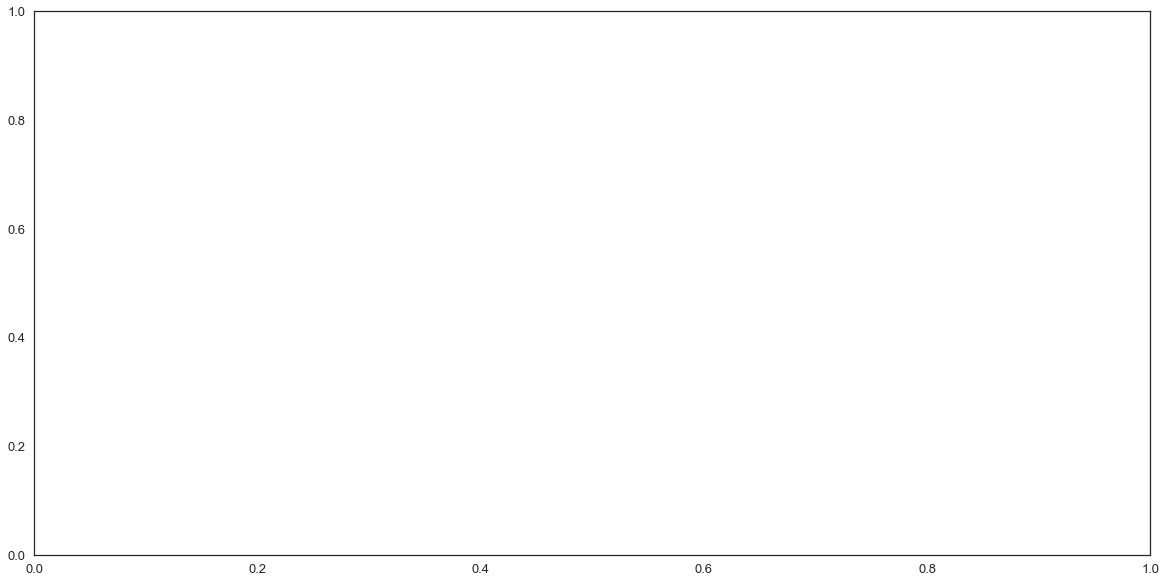

In [214]:
ax = match_totals_flip.plot(kind='scatter', x='New_ID_', y='TACKLES', color='DarkBlue', label='WIN' );


#### TOTAL TACKLES OVER TIME(WIN V LOSS)

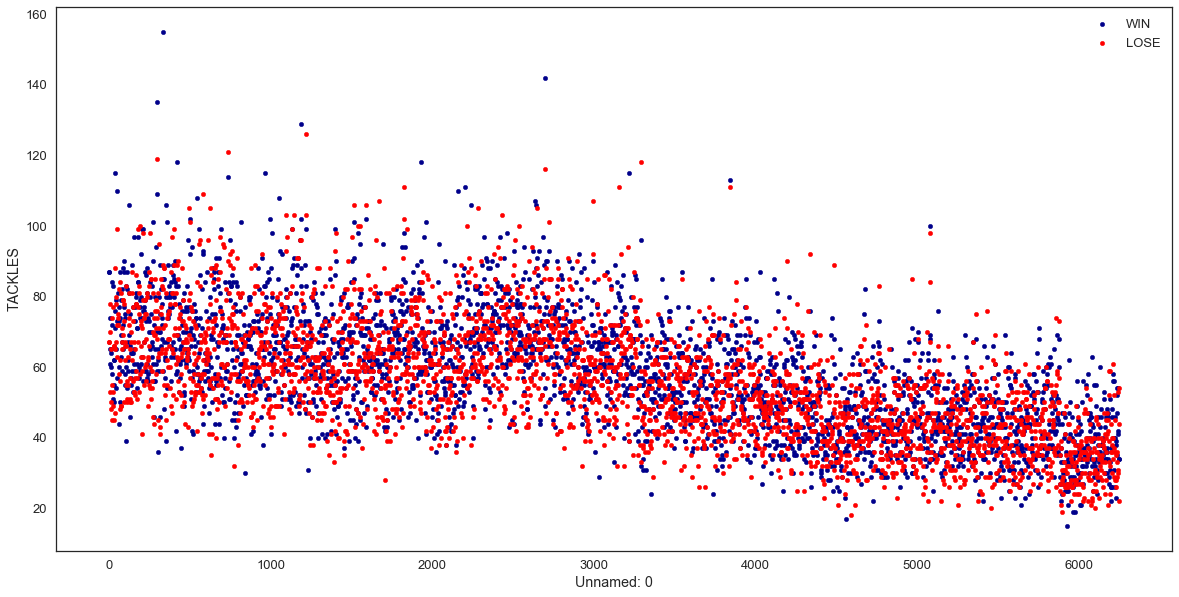

In [195]:
ax = df_win.plot(kind='scatter', x='Unnamed: 0', y="TACKLES", color='DarkBlue', label='WIN' );

df_lose.plot(kind='scatter', x='Unnamed: 0', y="TACKLES", color='Red', label='LOSE', ax=ax);

#### TACKLE SHARE BY GAME OVER TIME(WIN V LOSS)

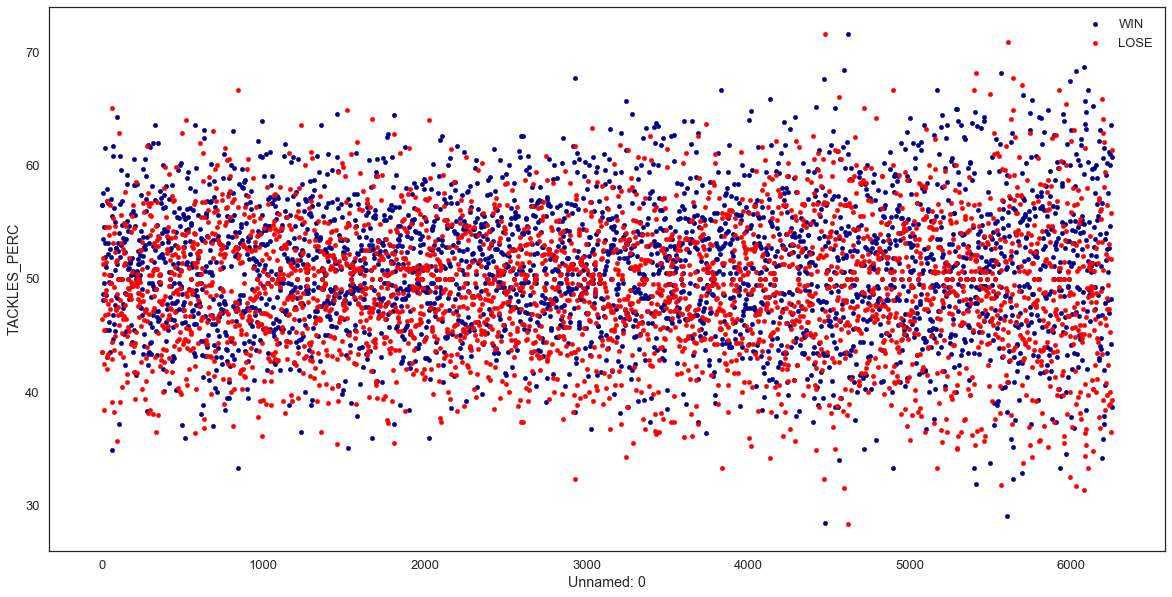

In [197]:
ax = df_win.plot(kind='scatter', x='Unnamed: 0', y="TACKLES_PERC", color='DarkBlue', label='WIN' );

df_lose.plot(kind='scatter', x='Unnamed: 0', y="TACKLES_PERC", color='Red', label='LOSE', ax=ax);

df = df[(df.CONTESTEDPOSSESSIONS) & (df.RESULT == "Win")].groupby(df.MATCH_ID)

In [20]:
df_win = df[df.RESULT == "Win"]

In [21]:
df_win.head(6000)

,Unnamed: 0,BEHINDS,BOUNCES,CENTRECLEARANCES,CLANGERS,CONTESTEDMARKS,CONTESTEDPOSSESSIONS,DISPOSALEFFICIENCY,DISPOSALS,DREAMTEAMPOINTS,...,YEAR,OPPONENT,TOTAL_SCORE,RESULT,TACKLES_PERC,CONTESTEDPOSSESSIONS_PERC,TOTALPOSSESSIONS_PERC,INSIDE50S_PERC,DISPOSALEFFICIENCY_PERC,CENTRECLEARANCES_PERC
1,1,12,3,16,55,11,149,79.0,352,1551,...,2017,Carlton,132,Win,56.49,51.92,50.94,55.96,51.77,45.71
3,3,10,3,10,44,12,135,77.0,392,1774,...,2017,Collingwood,100,Win,56.49,45.61,47.41,41.51,50.83,38.46
5,5,12,2,19,60,9,147,77.5,454,1905,...,2017,St Kilda,120,Win,53.51,51.40,57.27,56.12,52.65,57.58
7,7,8,3,18,69,12,161,69.3,339,1476,...,2017,Sydney Swans,110,Win,48.15,53.67,48.71,47.86,49.11,64.29
9,9,8,4,11,54,8,159,65.5,342,1447,...,2017,Gold Coast Suns,98,Win,48.68,50.64,46.67,36.21,47.74,34.38
10,10,14,8,14,51,7,144,76.6,428,1896,...,2017,Hawthorn,116,Win,57.52,50.35,53.93,48.70,50.49,45.16
13,13,10,4,15,46,15,131,76.8,414,1776,...,2017,North Melbourne,136,Win,49.61,48.88,55.01,51.85,50.96,42.86
14,14,15,14,18,58,7,147,76.6,415,1701,...,2017,GWS Giants,147,Win,54.55,53.07,54.97,58.04,50.03,51.43
17,17,7,19,12,61,20,150,76.0,363,1539,...,2017,Fremantle,115,Win,61.54,51.90,48.66,45.74,49.77,41.38
18,18,15,9,12,53,15,145,72.0,336,1402,...,2017,Collingwood,99,Win,51.33,48.99,46.16,50.47,50.78,44.44


### XX AS % WHEN WIN

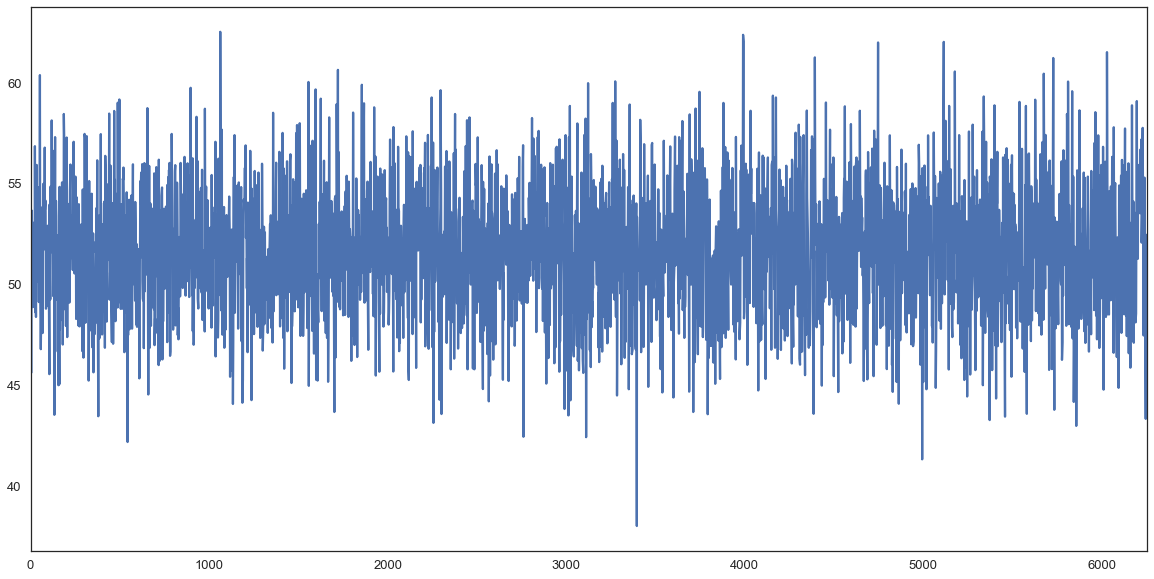

In [22]:
df_win["CONTESTEDPOSSESSIONS_PERC"].astype(float).plot()

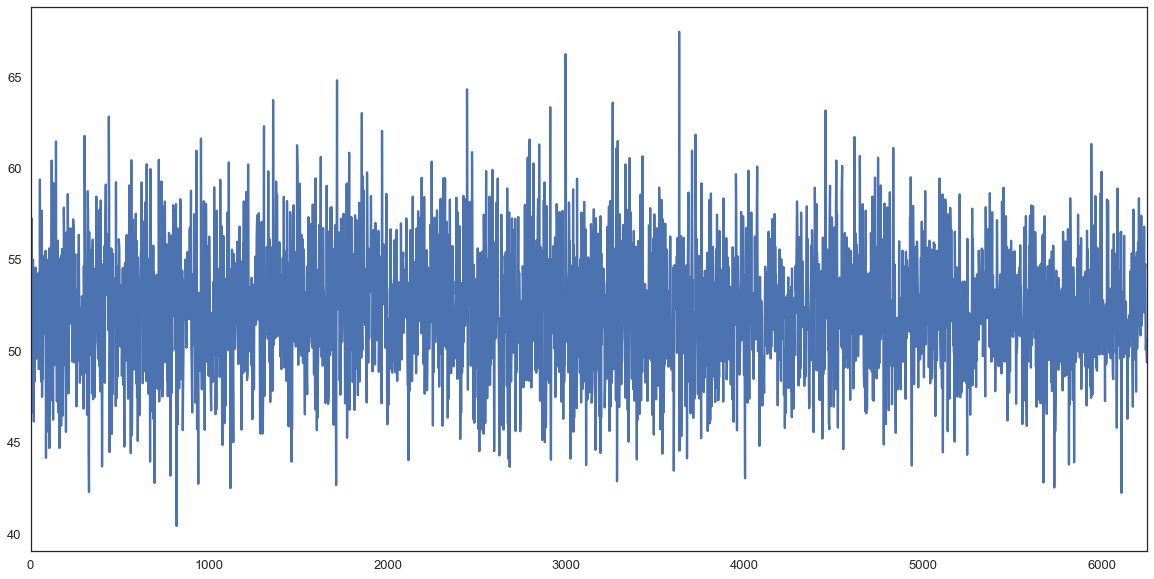

In [23]:
df_win["TOTALPOSSESSIONS_PERC"].astype(float).plot()

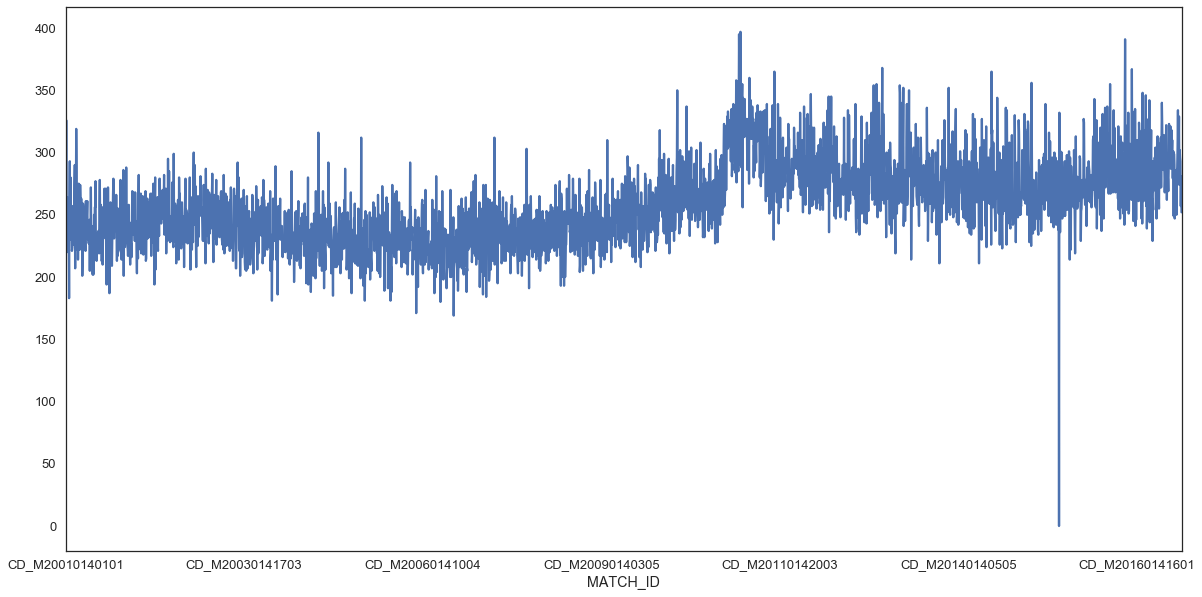

In [24]:
match_totals['CONTESTEDPOSSESSIONS'].astype(float).plot()

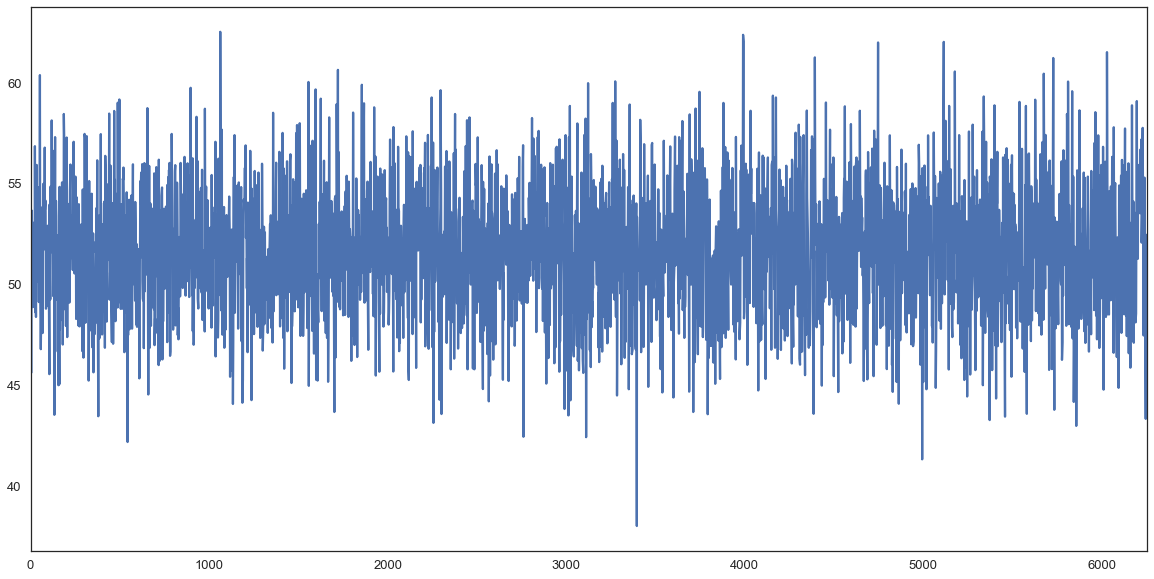

In [25]:
df_win['CONTESTEDPOSSESSIONS_PERC'].astype(float).plot()

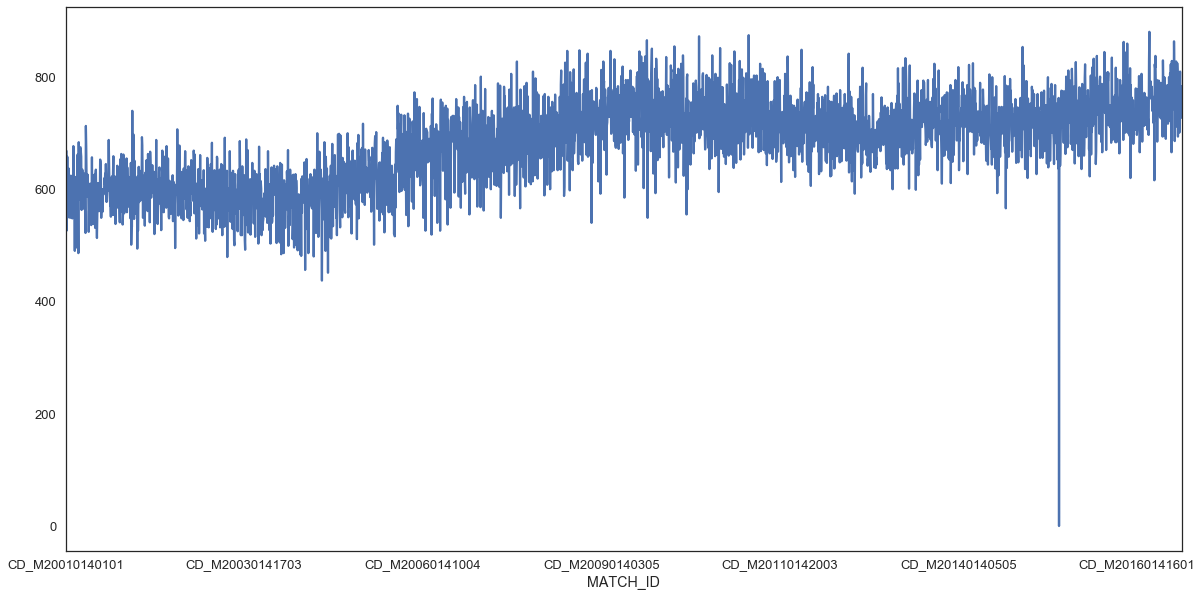

In [26]:
match_totals['TOTALPOSSESSIONS'].astype(float).plot()

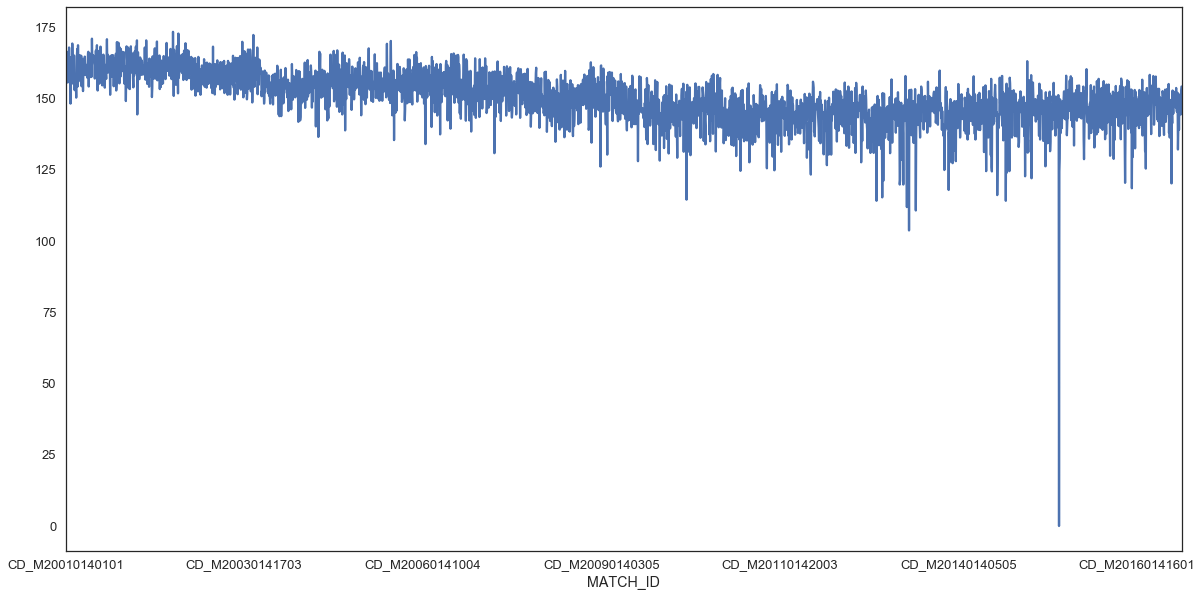

In [27]:
match_totals['DISPOSALEFFICIENCY'].astype(float).plot()

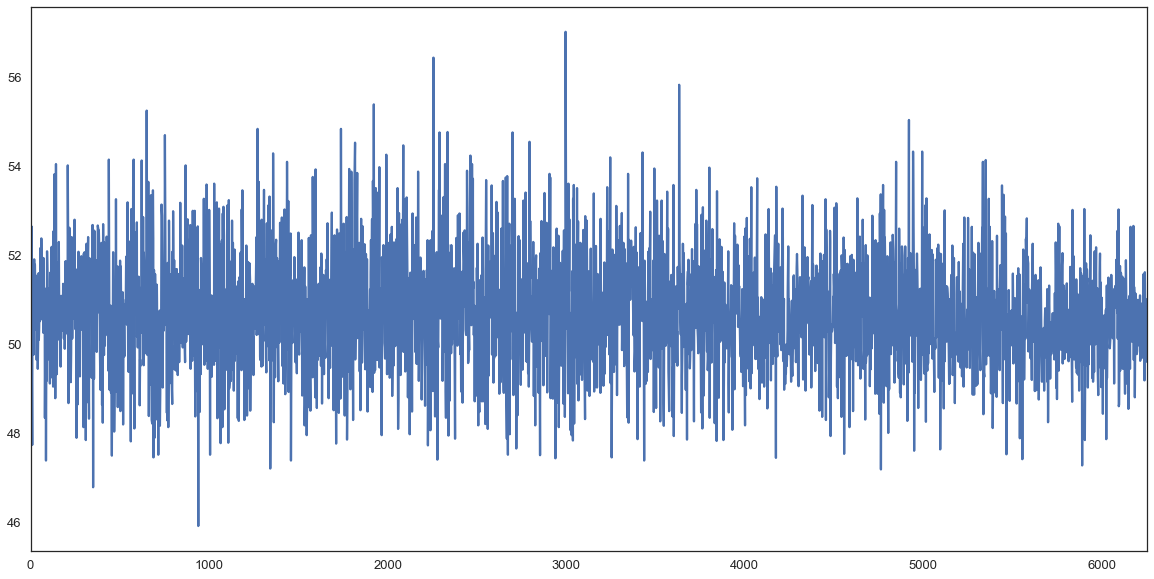

In [28]:
df_win['DISPOSALEFFICIENCY_PERC'].astype(float).plot()

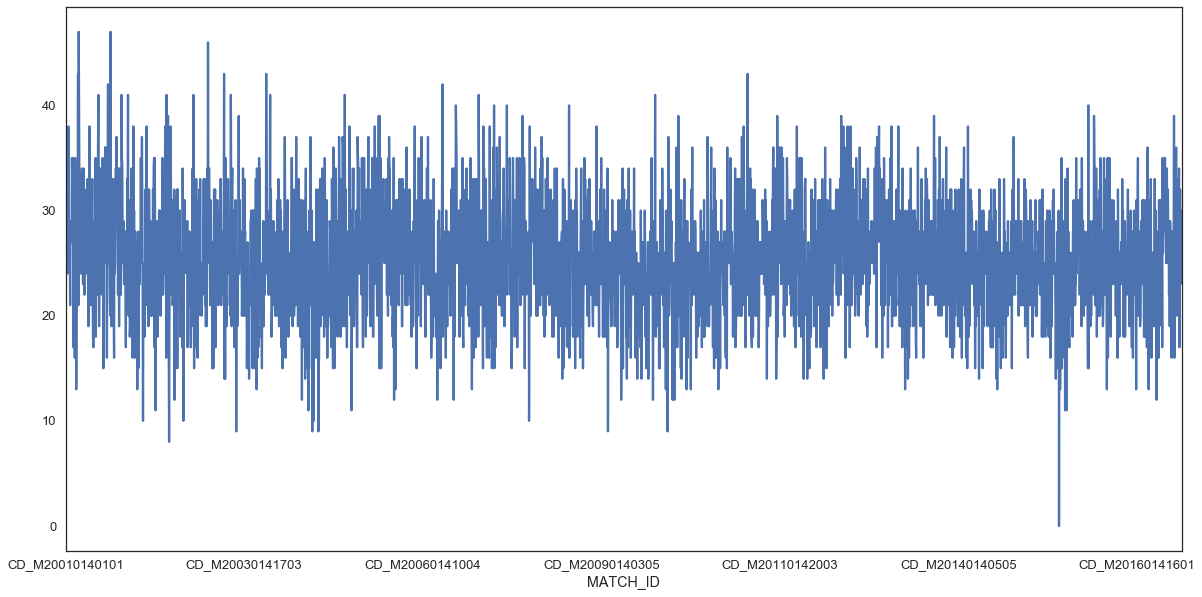

In [29]:
match_totals['CENTRECLEARANCES'].astype(float).plot()

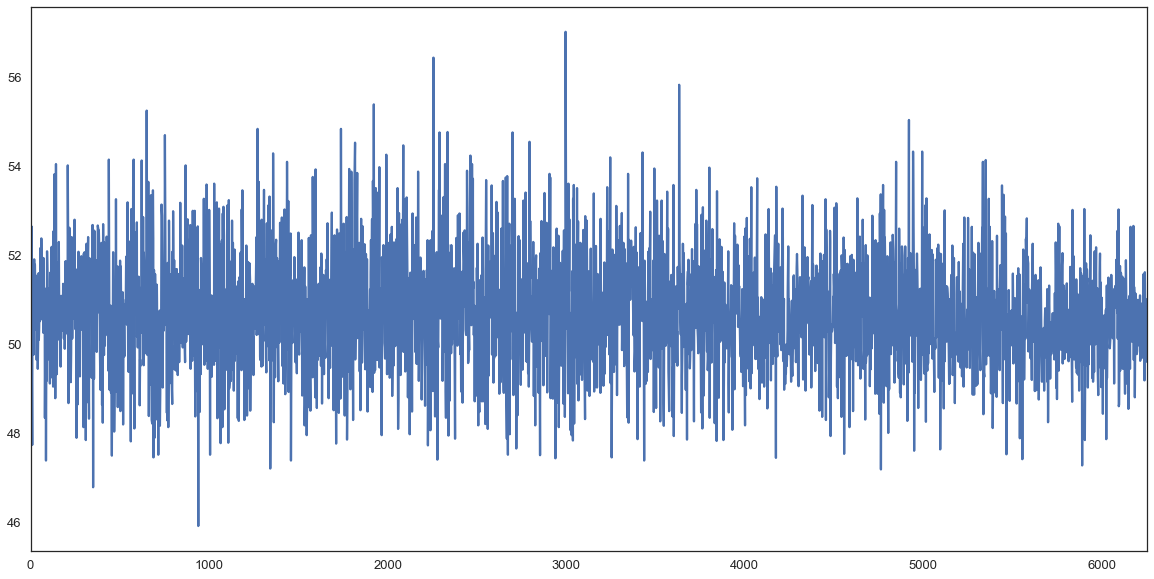

In [30]:
df_win['DISPOSALEFFICIENCY_PERC'].astype(float).plot()

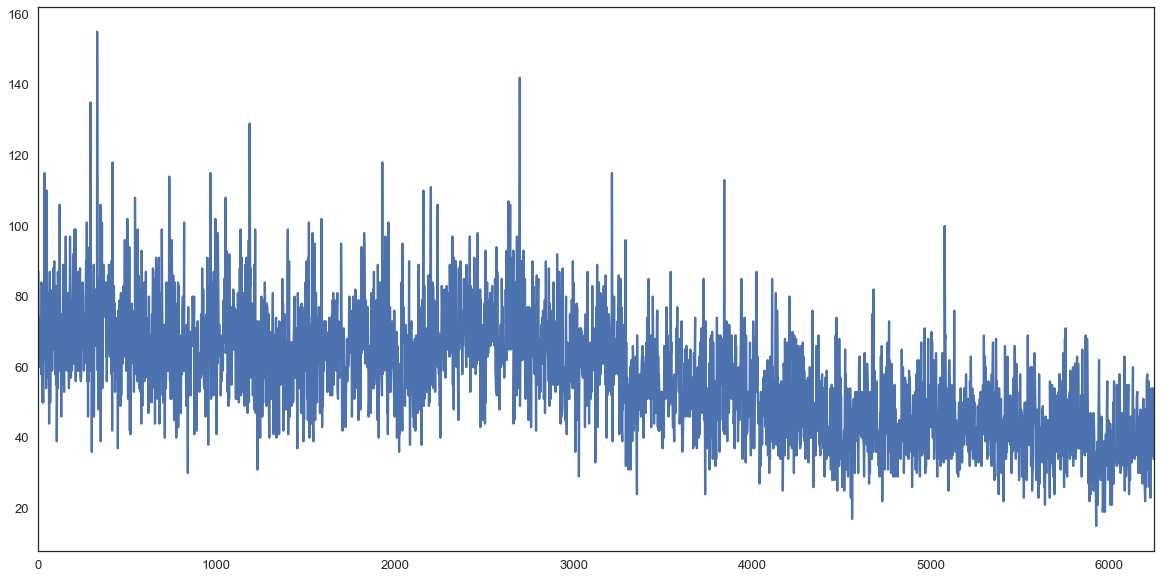

In [31]:
df_win['TACKLES'].astype(float).plot()

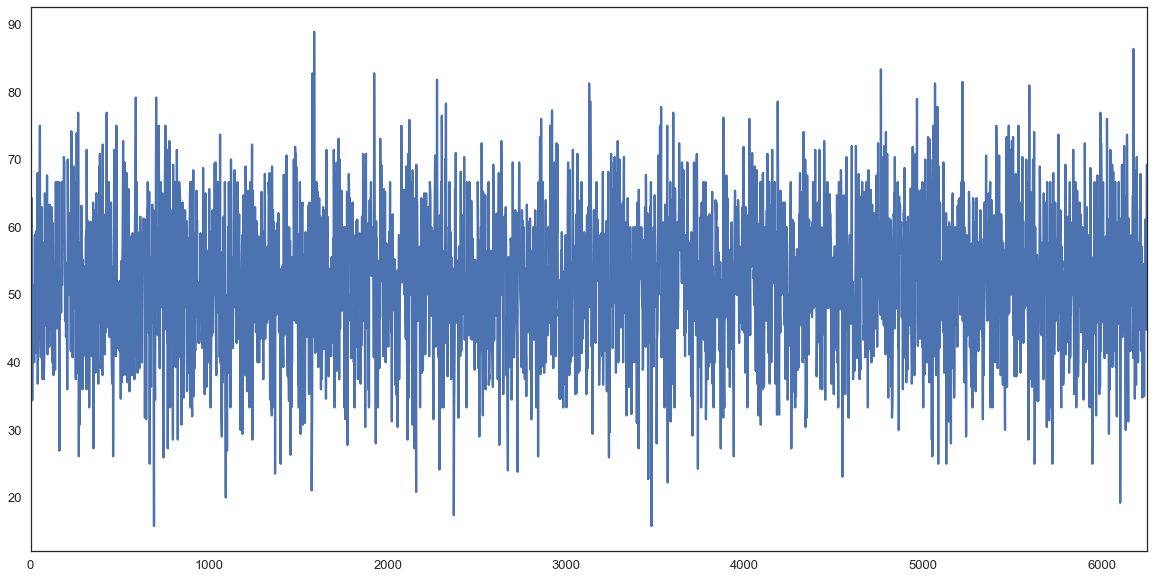

In [32]:
df_win["CENTRECLEARANCES_PERC"].astype(float).plot()

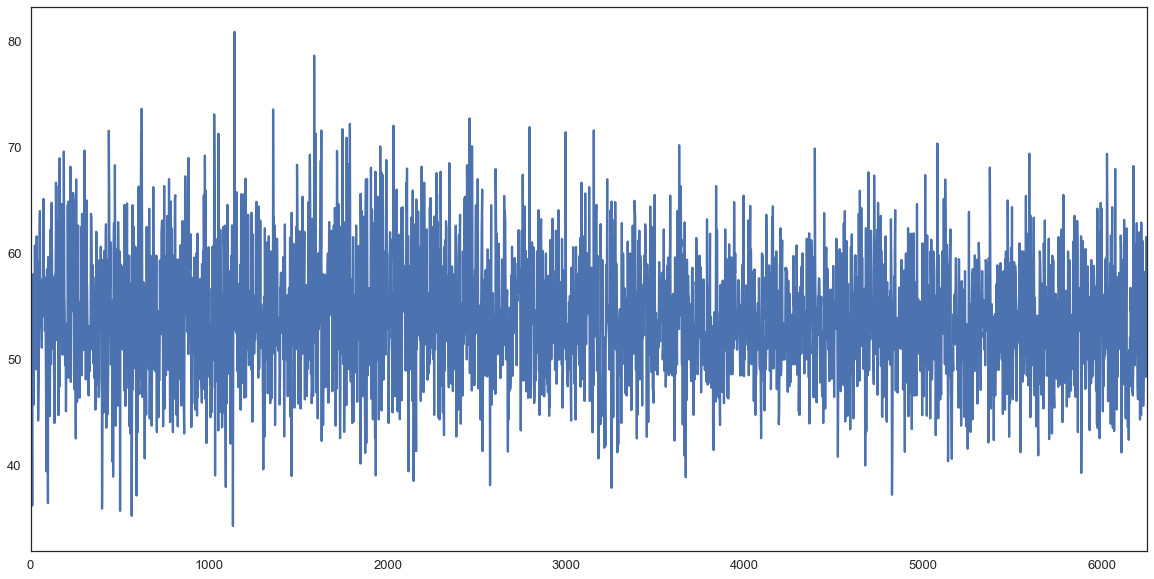

In [33]:
df_win["INSIDE50S_PERC"].astype(float).plot()

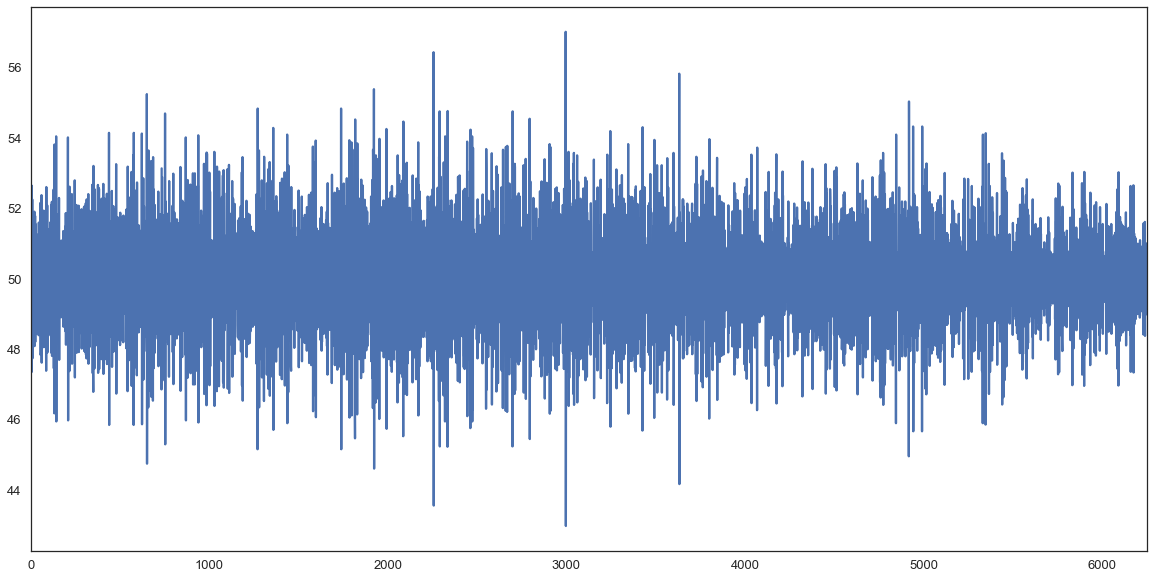

In [34]:
df["DISPOSALEFFICIENCY_PERC"].astype(float).plot()